# 05 Simple Bayesian Linear Regression

In this notebook, we will develop a bayesian linear regression model that has a zero mean isotropic gaussian prior. On some simulated data (linear and nonlinear ones), MLP, MAP and Bayesian Inference will be compared.  

From our lecture slides, 

In the linear regression model we have data $D$, of $n$ observations  
$D=\left\{ ({\bf x}_1, y_1), ({\bf x}_2,y_2), \ldots, ({\bf x}_n, y_n) \right\} $ where ${\bf x}$ 
denotes an input vector of dimension $d$ (features) and $y$ denotes a scalar output (target values). 
All data points are combined into a $(d) \times n$ matrix $X$. 
The model that determines the relationship between inputs and 
output is given by

$$ y   = \bf x^{T} {\bf \theta} + \epsilon $$

where ${\bf \theta}$ is a vector of parameters of the linear model. And the additive noise $\epsilon$ is iid Gaussian with
zero mean and variance $\sigma_y^2$ 

\begin{equation}
\epsilon \sim N(0, \sigma^2_y) 
\end{equation}





In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import random
random.seed(10)

# 1. Linear Problem

In [5]:
# Generate linear toy dataset
def linear_data(x):
    y = -0.4 + 0.8*x
    return y 
# Create training and test points
sigma_y   = 0.8  # fixed and known noise level
num_train = 30
dataset_linear = {}
dataset_linear['X_train'] = np.random.uniform(-2, 2, num_train)
dataset_linear['y_train'] = linear_data(dataset_linear['X_train']) + np.random.normal(0, sigma_y, num_train)
dataset_linear['X_test'] = np.linspace(-4, 4, 10*num_train)
dataset_linear['y_test'] = linear_data(dataset_linear['X_test'])

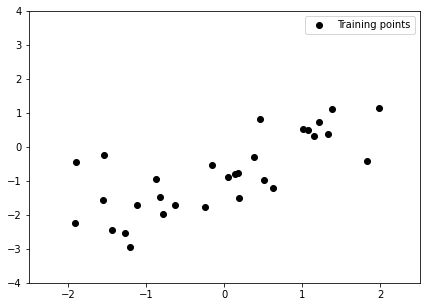

In [6]:
# Plot dataset
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2.5, xmin =-2.5)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

### Linear basis function

x will be converted to [1, x]. So that the bias can be included in the above equation. The data matrix $\mathbf{X}$ shape will be $(d+1) \times n$ 



In [7]:
def phi_linear(x):
    z = np.ones((x.shape[0],))
    res = np.stack((z,x), axis=1)
    return res

In [8]:
phi_train = phi_linear(dataset_linear['X_train'])

In [9]:
phi_train.shape

(30, 2)

## MLE Closed-Form Solution

The equation is given as:
$\hat{\theta}_{ml}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$


In [10]:
def mle_compute(phi_x, y):
    #phi_x is the feature matrix
    #y is the label
    Sigma_N = np.dot(phi_x.T, phi_x)
    theta  = np.dot(np.dot(np.linalg.inv(Sigma_N), phi_x.T), y)
    return theta

In [11]:
theta = mle_compute(phi_train, dataset_linear['y_train'] )

In [12]:
phi_test =  phi_linear(dataset_linear['X_test'])
y_predict = phi_test.dot(theta)

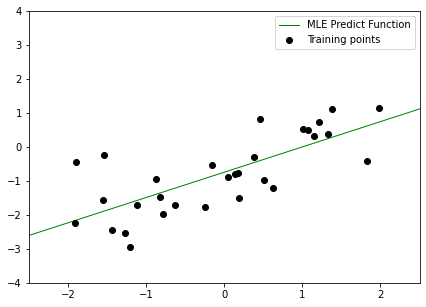

In [13]:
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2.5, xmin =-2.5)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_test'], y_predict, color='green', linewidth=1, label="MLE Predict Function")
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

## MAP Closed-Form Solution


In the Bayesian framework inference we need to specify a prior
over the parameters that expresses our belief about the parameters
before we take any measurements. A wise choice is a zero-mean isotropic gaussian

$\mathbf{\theta}\sim\mathcal{N}(\mathbf{0}, \tau_0^2\mathbf{I}_{d \times d})$

We can now continue with the standard Bayesian formalism 

\begin{eqnarray}
 p(\bf \theta| \bf y,X) &\propto& p(\bf y | X, \bf \theta) \, p(\bf \theta) \nonumber \\
                       &\propto& \exp{ \left(- \frac{1}{2 \sigma_y^2}(\bf y-X^T \bf \theta)^T(\bf y - X^T \bf \theta) \right)}
                        \exp{\left( -\frac{1}{2 \tau_0^2} \bf \theta^T \bf \theta \right)}  \nonumber \\ 
 \end{eqnarray}


In the next step we `complete the square' and obtain 

\begin{equation}
p(\bf \theta| \bf y,X)  \propto  \exp \left( -\frac{1}{2} (\bf \theta - \bf \theta_n)^T \mathbf{V}_n^{-1}(\bf \theta - \bf \theta_n )  \right)
\end{equation}

MAP Solution will be the mean of the posterior distribution

\begin{equation}
\hat{\theta}_{map}=(\frac{\sigma_y^2}{\tau_0^2}\mathbf{I}_{d\times d}+\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}

In [14]:
def map_compute(phi_x, y, prior_tau, sigma_y=0.5):
    """
    phi_x is the training feature matrix
    y is the training label
    prior_tau denotes the uncertainty behind our prior belief over model parameters
    sigma_y is the noisy level
    """
    Sigma_N = np.dot(phi_x.T, phi_x) + pow(sigma_y,2)/pow(prior_tau,2) * np.identity(phi_x.shape[1])
    theta  = np.dot(np.dot(np.linalg.inv(Sigma_N), phi_x.T), y)
    return theta

In [15]:
prior_tau = 0.4
theta_2  = map_compute(phi_train, dataset_linear['y_train'], prior_tau, sigma_y)

In [16]:
y_predict_map = phi_test.dot(theta_2)

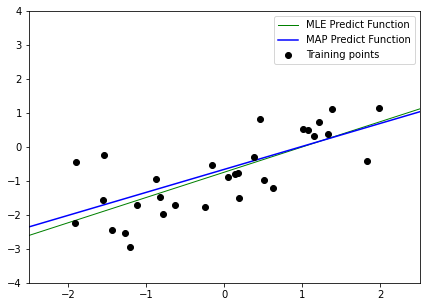

In [17]:
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2.5, xmin =-2.5)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_test'], y_predict, color='green', linewidth=1, label="MLE Predict Function")
plt.plot(dataset_linear['X_test'], y_predict_map, color='blue', linewidth=1.5, label="MAP Predict Function")
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

## Bayesian Analytics Solution


The posterior distribution follows Gaussian

$$ p(\bf \theta| X, {\bf y}) \sim {\cal N}(\theta_n , V_n ) $$ 

where ${\theta}_{n}=(\frac{\sigma_y^2}{\tau_0^2}\mathbf{I}_{d\times d}+\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ and $V_n = \sigma_y^2(\frac{\sigma_y^2}{\tau_0^2}\mathbf{I}_{d\times d}+\mathbf{X}^T\mathbf{X})^{-1}$

In [18]:
def bayes_compute(phi_x, y, prior_tau, sigma_y):
    Sigma_N = np.dot(phi_x.T, phi_x) + pow(sigma_y,2)/pow(prior_tau,2) * np.identity(phi_x.shape[1])
    inver_sigma = np.linalg.inv(Sigma_N)
    theta  = np.dot(np.dot(inver_sigma, phi_x.T), y)
    var_theta = pow(sigma_y,2)*inver_sigma
    return theta, var_theta

In [19]:
#positer prediction
theta_mean, var_theta  = bayes_compute(phi_train, dataset_linear['y_train'], prior_tau, sigma_y)

In [20]:
var_theta

array([[0.01887496, 0.00088748],
       [0.00088748, 0.01531415]])

#### Sample from posterior distribution

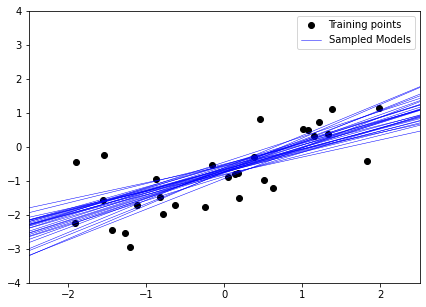

In [21]:
#sample from positier distribution
n_sample = 30
z = np.random.multivariate_normal(mean=theta_mean, cov=var_theta, size=n_sample)
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2.5, xmin =-2.5)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
for idx, one_model in enumerate(z):
    y_predict_sample = phi_test.dot(one_model)
    if idx == 0:
        plt.plot(dataset_linear['X_test'], y_predict_sample, color='blue', linewidth=0.5,label='Sampled Models')
    else:
        plt.plot(dataset_linear['X_test'], y_predict_sample, color='blue', linewidth=0.5)
plt.legend()
plt.show()    

#### Bayesian prediction

To make predictions for a test case we average over all possible parameter predictive distribution
values, weighted by their posterior probability. This is in contrast to non Bayesian schemes, where a single parameter is typically chosen by some criterion. 

Thus the predictive distribution at some $x_{new}$ is given by averaging the output of all possible linear models w.r.t. the  posterior

\begin{eqnarray} 
p(y_{new} | x_{new}, {\bf D}) &=& \int p({\bf y}_{new}| {\bf x}_{new}, {\bf \theta} ) p(\bf \theta| D)d\theta \nonumber \\
                                    &=& \mathcal{N}(y_{new}|x_{new}^T\theta_n, \sigma_y^2+x_{new}^T\mathbf{V}_nx_{new}),
\end{eqnarray}

which is again Gaussian, with a mean given by the posterior mean multiplied by the test input
and the variance is a quadratic
form of the test input with the posterior covariance matrix, showing that the
predictive uncertainties grow with the magnitude of the test input, as one would
expect for a linear model. 


In [22]:
y_preds = []
std_preds = []
for testdata in phi_test:
    y_pred = testdata.T.dot(theta_mean)
    std_pred = np.sqrt(sigma_y*sigma_y+testdata.T.dot(var_theta).dot(testdata))
    y_preds.append(y_pred)
    std_preds.append(std_pred)

In [23]:
y_preds = np.array(y_preds)
std_preds = np.array(std_preds)

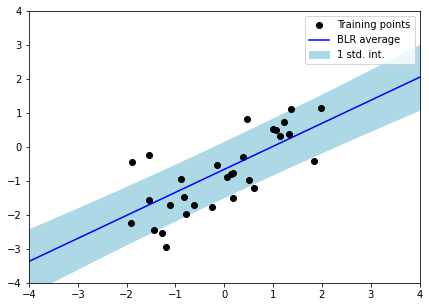

In [24]:
plt.figure(figsize=(7,5))
plt.xlim(xmax = 4, xmin =-4)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.plot(dataset_linear['X_test'], y_preds, color='blue', label="BLR average")
plt.fill_between(dataset_linear['X_test'], y_preds-1*std_preds, y_preds+1*std_preds, color='lightblue', label='1 std. int.')
plt.legend()
plt.show()

# 2. Non-Linear Problem

In [25]:
# Generate linear toy dataset
def sinus_data(x):
    y = 0.6*np.sin(2*np.pi*x) + 0.4*x
    return y 
# Create training and test points
sigma_y   = 0.3  # fixed and known noise level
num_train = 50
dataset_linear = {}
dataset_linear['X_train'] = np.random.uniform(-2, 2, num_train)
# add noise on training data
dataset_linear['y_train'] = sinus_data(dataset_linear['X_train']) + np.random.normal(0, sigma_y, num_train)
dataset_linear['X_test'] = np.linspace(-4, 4, 10*num_train)
dataset_linear['y_test'] = sinus_data(dataset_linear['X_test'])

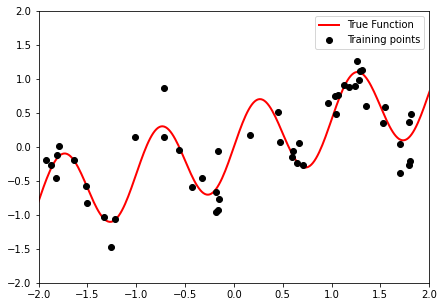

In [26]:
# Plot dataset
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2, xmin =-2)
plt.ylim(ymax = 2, ymin = -2)
plt.plot(dataset_linear['X_test'], dataset_linear['y_test'], color='red', linewidth=2, label="True Function")
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

#### Polynomial basis function

In [27]:
# Define basis function
from sklearn.preprocessing import PolynomialFeatures
def phi_polynomial(x, D=5):
    """ Polynomial Basis Functions
    
    Args:
      x: (float) 1D input
      
    Returns:
      (array) polynomial features of x
    """
    poly = PolynomialFeatures(degree=D)
    return poly.fit_transform(x.reshape(-1, 1))

In [28]:
phi_train = phi_polynomial(dataset_linear['X_train'])
phi_test = phi_polynomial(dataset_linear['X_test'])

##### Polynomial Fits for Different Degrees

Understand the relationship between overfitting and model complexity

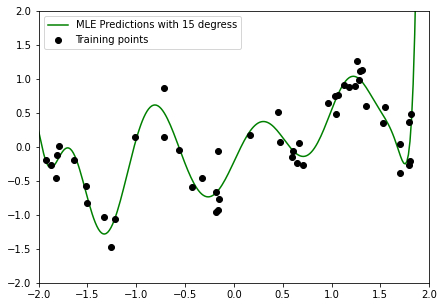

In [29]:
degree = 15 #vary the degree here
phi_train = phi_polynomial(dataset_linear['X_train'], degree)
phi_test = phi_polynomial(dataset_linear['X_test'],   degree)
theta = mle_compute(phi_train, dataset_linear['y_train'])
y_predict_mle = phi_test.dot(theta)
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2, xmin =-2)
plt.ylim(ymax = 2, ymin = -2)

plt.plot(dataset_linear['X_test'], y_predict_mle, color='green', linewidth=1.5, label="MLE Predictions with {} degress".format(degree))
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

## Maximum-A-Posterior Estimation

Adding a regularizer is identical to using a prior distribution $p(\theta)$   on the model parameters 

In [30]:
prior_tau1 = 0.1
theta_map1 = map_compute(phi_train, dataset_linear['y_train'], prior_tau1, sigma_y)

In [31]:
prior_tau2 = 1.5
theta_map2 = map_compute(phi_train, dataset_linear['y_train'], prior_tau2, sigma_y)

In [32]:
y_predict_map1 = phi_test.dot(theta_map1)
y_predict_map2 = phi_test.dot(theta_map2)

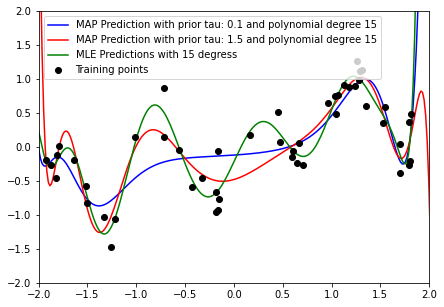

In [33]:
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2, xmin =-2)
plt.ylim(ymax = 2, ymin = -2)
plt.plot(dataset_linear['X_test'], y_predict_map1, color='blue', linewidth=1.5, label="MAP Prediction with prior tau: {} and polynomial degree {}".format(prior_tau1, degree))
plt.plot(dataset_linear['X_test'], y_predict_map2, color='red', linewidth=1.5, label="MAP Prediction with prior tau: {} and polynomial degree {}".format(prior_tau2, degree))
plt.plot(dataset_linear['X_test'], y_predict_mle, color='green', linewidth=1.5, label="MLE Predictions with {} degress".format(degree))
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.legend()
plt.show()

### Bayesian Regression

In [34]:
#positer prediction
theta_mean, var_theta  = bayes_compute(phi_train, dataset_linear['y_train'], prior_tau1, sigma_y)

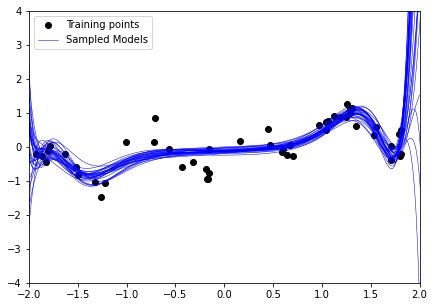

In [35]:
#sample from positier distribution
n_sample = 30
z = np.random.multivariate_normal(mean=theta_mean, cov=var_theta, size=n_sample)
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2, xmin =-2)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
for idx, one_model in enumerate(z):
    y_predict_sample = phi_test.dot(one_model)
    if idx == 0:
        plt.plot(dataset_linear['X_test'], y_predict_sample, color='blue', linewidth=0.5,label='Sampled Models')
    else:
        plt.plot(dataset_linear['X_test'], y_predict_sample, color='blue', linewidth=0.5)
plt.legend()
plt.show()    

In [38]:
y_preds = []
std_preds = []
for testdata in phi_test:
    y_pred = testdata.T.dot(theta_mean)
    std_pred = np.sqrt(sigma_y*sigma_y+testdata.T.dot(var_theta).dot(testdata))
    y_preds.append(y_pred)
    std_preds.append(std_pred)

In [39]:
y_preds = np.array(y_preds)
std_preds = np.array(std_preds)

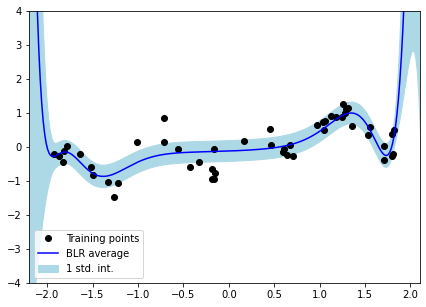

In [45]:
plt.figure(figsize=(7,5))
plt.xlim(xmax = 2.1, xmin =-2.2)
plt.ylim(ymax = 4, ymin = -4)
plt.plot(dataset_linear['X_train'], dataset_linear['y_train'], 'o', color='black', label='Training points')
plt.plot(dataset_linear['X_test'], y_preds, color='blue', label="BLR average")
plt.fill_between(dataset_linear['X_test'], y_preds-1*std_preds, y_preds+1*std_preds, color='lightblue', label='1 std. int.')
plt.legend()
plt.show()